In [2]:
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import pandas as pd

In [ ]:
def wav_files_to_csv(directory_list, dest_path):
    classes = {"yes": 0, "no": 1, "up": 2, "down": 3, "left": 4, "right": 5, "on": 6,
               "off": 7, "stop": 8, "go": 9, "unknown": 10, "silence": 11}
    columns = ["labels"]
    for i in range(9159):
        columns.append("p" + str(i))
    df = pd.DataFrame(columns=columns)
    path = "../resources/train/audio/"
    
    dir_count = 1
    row = 0
    for directory in directory_list:
        file_names = next(os.walk(os.path.join(path, directory)))[2]
        random.shuffle(file_names)
        #file_names = file_names[:800] # grab a sample of 800 for every category
        file_count = 0
        for file in file_names:
            audio = os.path.join(path, directory, file)
            sample_rate, samples = wavfile.read(audio)
            if (samples.shape[0] < 16000):
                samples = np.append(samples, np.zeros(16000 - samples.shape[0]))
            freq, times, spectrogram = signal.spectrogram(samples, sample_rate)
            spectrogram = spectrogram.flatten()
            spectrogram = np.where(spectrogram == 0, 0, np.log(spectrogram))
            spectrogram = np.insert(spectrogram, 0, classes[directory]) # insert label
            df.loc[row] = spectrogram
            row += 1
            file_count += 1
            if (file_count % 100 == 0):
                print("file: {} dir: {} of {}".format(file_count, dir_count, len(directory_list)))
        dir_count += 1
    print("converting to csv...")
    df = df.astype({"labels": int})
    df = df.sample(frac=1) #shuffle rows
    df.to_csv(path_or_buf=dest_path, index=False)
    return (df)

In [ ]:
dir_list = ["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]
#dir_list = ["yes", "no"]
yes_no = wav_files_to_csv(dir_list, "../resources/train_csv/dataset_800.csv")

In [12]:
directory = "../resources/test/audio/"
file_names = next(os.walk(os.path.join(directory)))[2]
file_names.sort()
file_names_1 = file_names[0:5000]
file_names_2 = file_names[5000:10000]

In [4]:
def display_random(directory, file_names, i):
    #audio = os.path.join(directory, random.choice(file_names))
    audio = os.path.join(directory, file_names[i])
    sample_rate, sample = wavfile.read(audio)
    freq, times, spectogram = signal.spectrogram(sample, sample_rate)
    print("sample =", sample.shape)
    print("sample_rate =", sample_rate)
    print("audio_path =", audio)
    print("spectogram =", spectogram.shape)
    f, ax = plt.subplots(figsize=(20, 15))
    #plt.pcolormesh(times, freq, np.log(spectogram))
    plt.pcolormesh(np.log(spectogram))
    plt.ylabel("Frequency [Hz]")
    plt.xlabel("Time in [sec]")
    plt.show()
    plt.specgram(sample, Fs=sample_rate);

sample = (16000,)
sample_rate = 16000
audio_path = ../resources/test/audio/clip_05c2dcc5d.wav
spectogram = (129, 71)


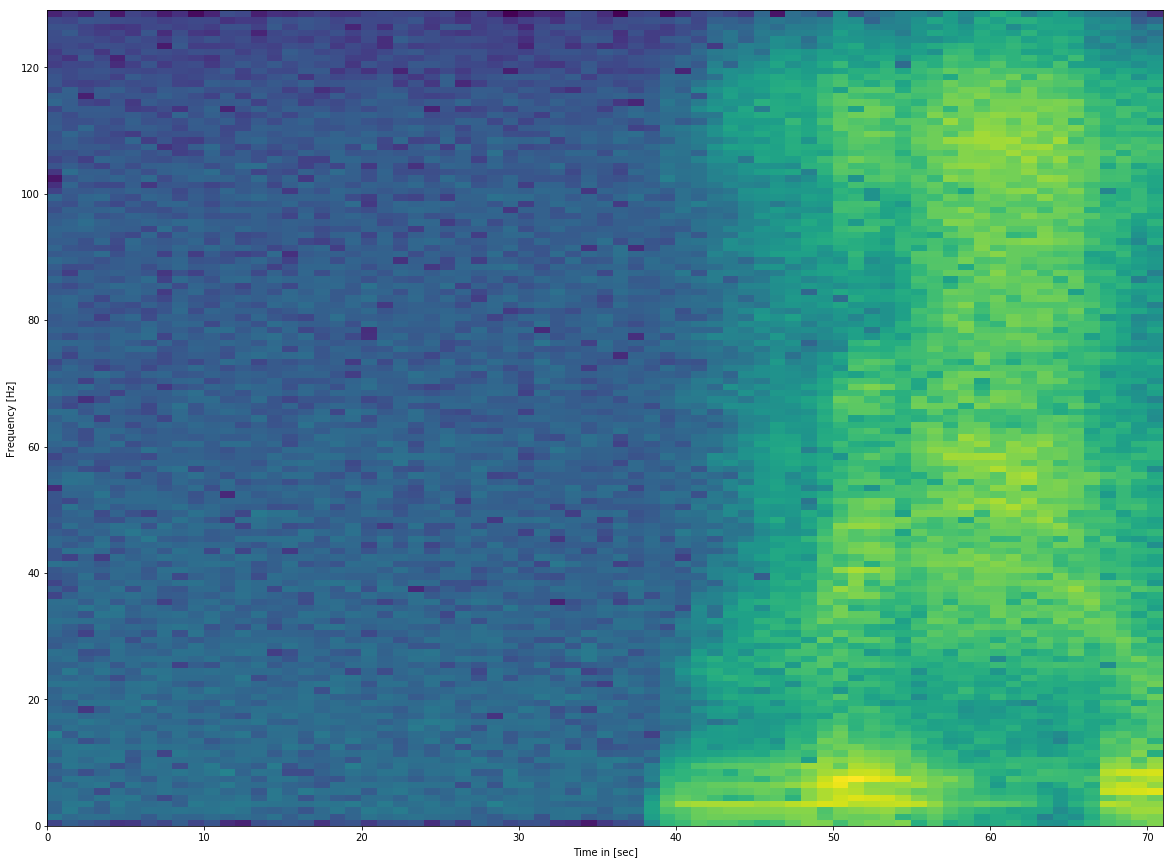

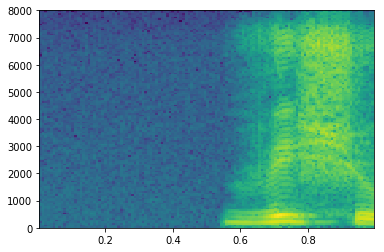

In [17]:
n = 3567
display_random(directory, file_names_1, n)

sample = (16000,)
sample_rate = 16000
audio_path = ../resources/test/audio/clip_0dcb91a97.wav
spectogram = (129, 71)


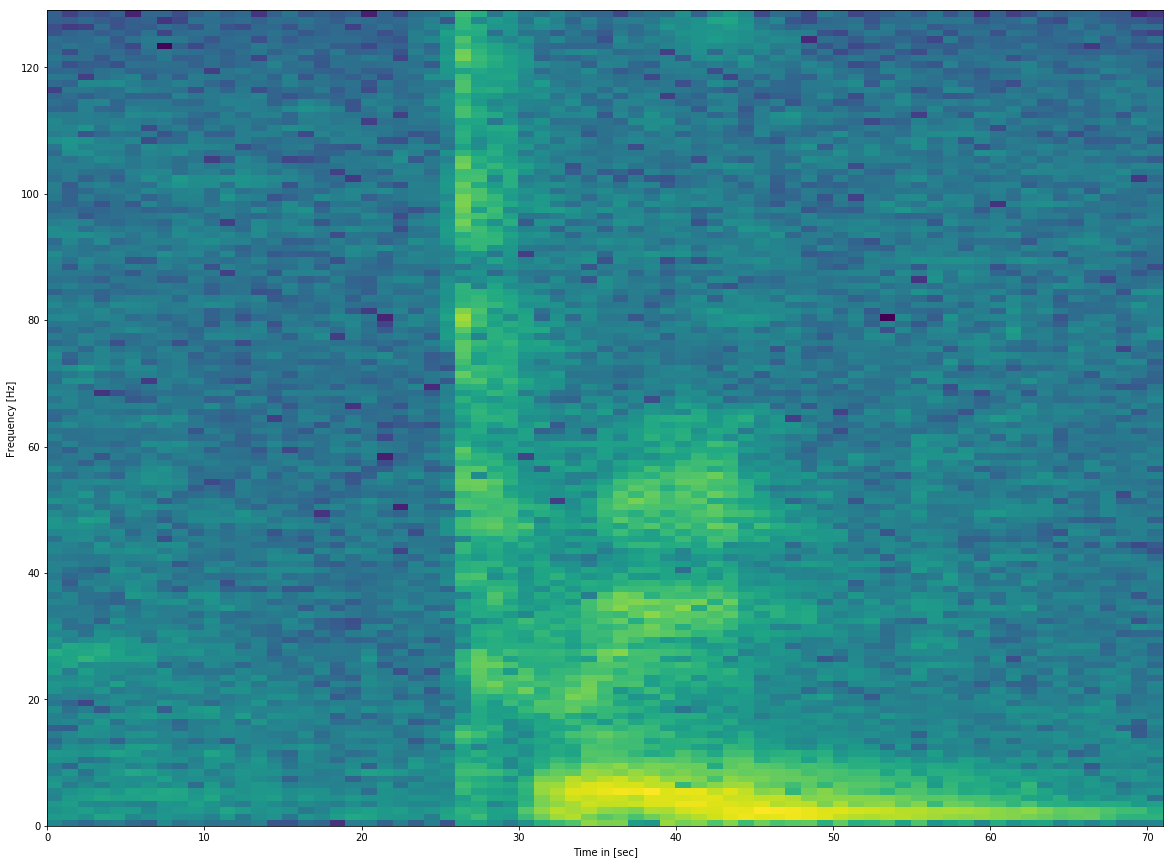

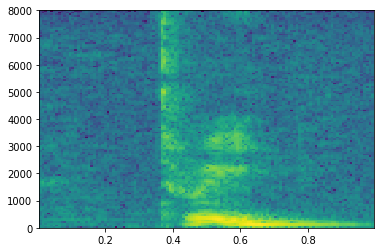

In [18]:
display_random(directory, file_names_2, n)